In [1]:
#Importing the essential libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
spotify = pd.read_excel('spotify-2023.xlsx') 
spotify                    

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### Overview of Dataset

##### 1. How many rows and columns does the dataset contain?

In [5]:
#Counting the rows and columns of the data set 
print("Numbers of Rows and Columns of the Data Set")
spotify.shape

Numbers of Rows and Columns of the Data Set


(953, 24)

##### 2. What are the data types of each column? Are there any missing values?


In [7]:
#Data types of each column and missing values  
print("Data types of each Columns: ")
spotify.dtypes 

Data types of each Columns: 


track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [9]:
#Determining the missising values in each columns 
print("Missing values of each Columns : ") 
spotify.isnull().sum()

Missing values of each Columns : 


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

### Basic Descriptive Statistics

##### 1. What are the mean, median, and standard deviation of the streams column?

In [13]:
#converting the non-numeric values 
#reason: because based on the data type, the streams are in object type.
spotify['streams'] = pd.to_numeric(spotify['streams'], errors = 'coerce') 

In [85]:
#Getting the mean, median, and standard devition of ther streams 
mean_streams = spotify['streams'].mean()
print(f"The Mean of Streams: {mean_streams}\n")

median_streams = spotify['streams'].median()
print(f"The Median of Streams: {median_streams}\n")

std_streams = spotify['streams'].std()
print(f"The Standard Deviation of Streams: {std_streams}")

The Mean of Streams: 514137424.93907565

The Median of Streams: 290530915.0

The Standard Deviation of Streams: 566856949.0388832


##### 2. What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

Distribution for released_year: 
count     953.000000
mean     2018.238195
std        11.116218
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64

Distribution for artist_count: 
count    953.000000
mean       1.556139
std        0.893044
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64


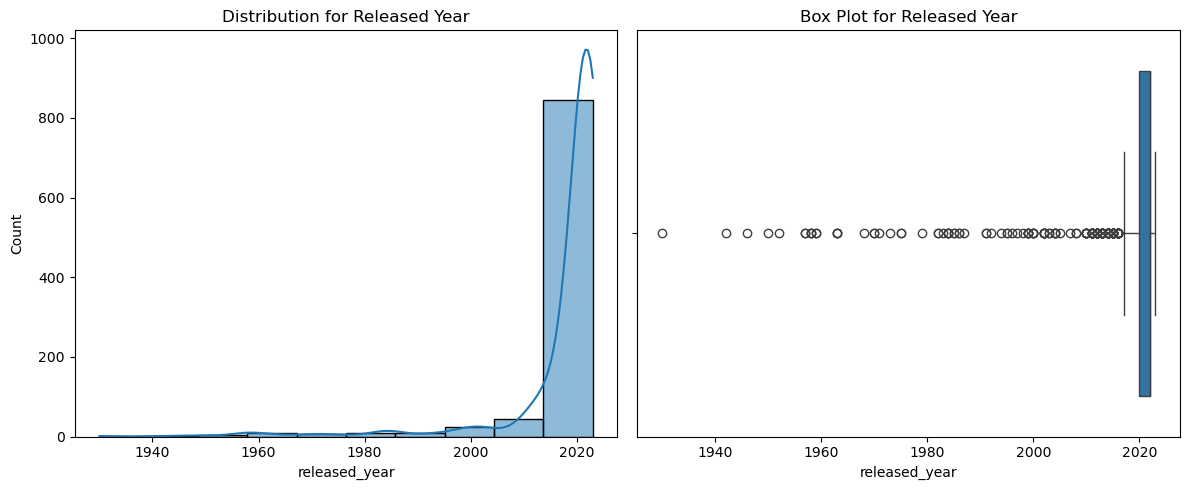

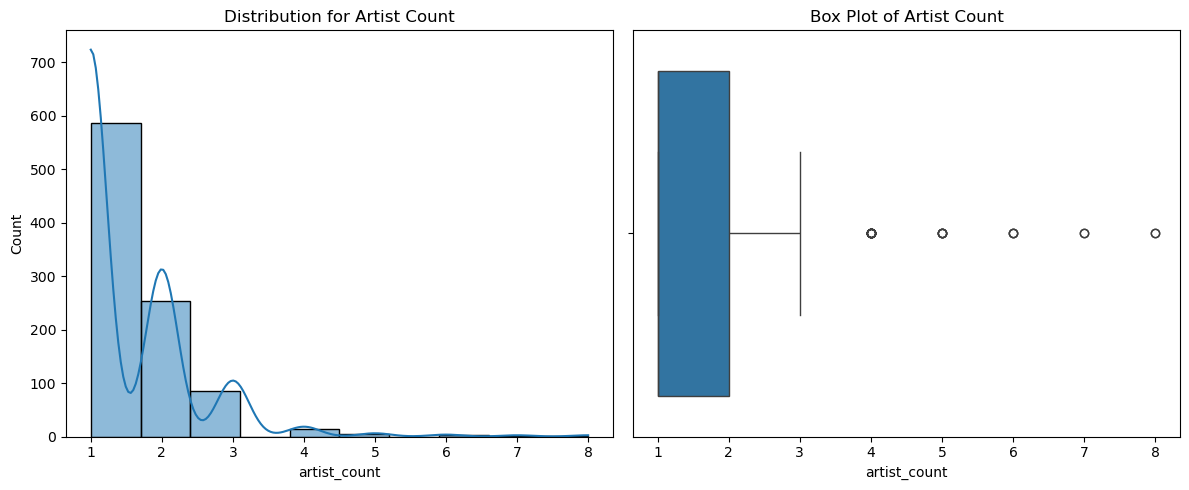

In [81]:
#Distribution of released_year and artist_count 
print("Distribution for released_year: ")
print(spotify['released_year'].describe())


print("\nDistribution for artist_count: ")
print(spotify['artist_count'].describe())

#Graphs for released_year 
#Visualization for the Distribution of released_year using histograph 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(spotify['released_year'], bins=10, kde=True)
plt.title("Distribution for Released Year")

#Visualization for the Distribution of released_year using boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=spotify['released_year'])
plt.title("Box Plot for Released Year")
plt.tight_layout()
plt.show()

#Graphs for artist_count
#Visualization for the Distribution of artist_count using histograph 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(spotify['artist_count'], bins=10, kde=True)
plt.title("Distribution for Artist Count")

#Visualization for the Distribution of artist_count using boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=spotify['artist_count'])
plt.title('Box Plot of Artist Count')
plt.tight_layout()
plt.show()

### Top Performers

##### 1. Which track has the highest number of streams? Display the top 5 most streamed tracks.

In [32]:
#Sorting the DataFrame in terms of streams in descending order to determine the Top 5 most streamed tracks 
top_five_tracks =  spotify.sort_values(by = 'streams', ascending = False).head(5)

#Displaying the result with the name of the track and it's streams (to determibe the highest number of stream)
print("The Top 5 Most Streamed Tracks in Spotify for 2023: ")
print(top_five_tracks[['track_name', 'streams']])


The Top 5 Most Streamed Tracks in Spotify for 2023: 
                                        track_name       streams
55                                 Blinding Lights  3.703895e+09
179                                   Shape of You  3.562544e+09
86                               Someone You Loved  2.887242e+09
620                                   Dance Monkey  2.864792e+09
41   Sunflower - Spider-Man: Into the Spider-Verse  2.808097e+09


##### 2. Who are the top 5 most frequent artists based on the number of tracks in the dataset?


In [101]:
#Grouping the artists and the count of tracks of each artist (Only the Top 5) 
top_artists = spotify['artist(s)_name'].value_counts().head(5) 

#Displaying the Top 5 Most Frequent Artist in the DataFrame based on the number of thier tracks 
print(f"The Top 5 Most Frequent Artist Based on the Number of Tracks: \n") 
print(top_artists)

The Top 5 Most Frequent Artist Based on the Number of Tracks: 

artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64


### Temporal Trends

##### 1. Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

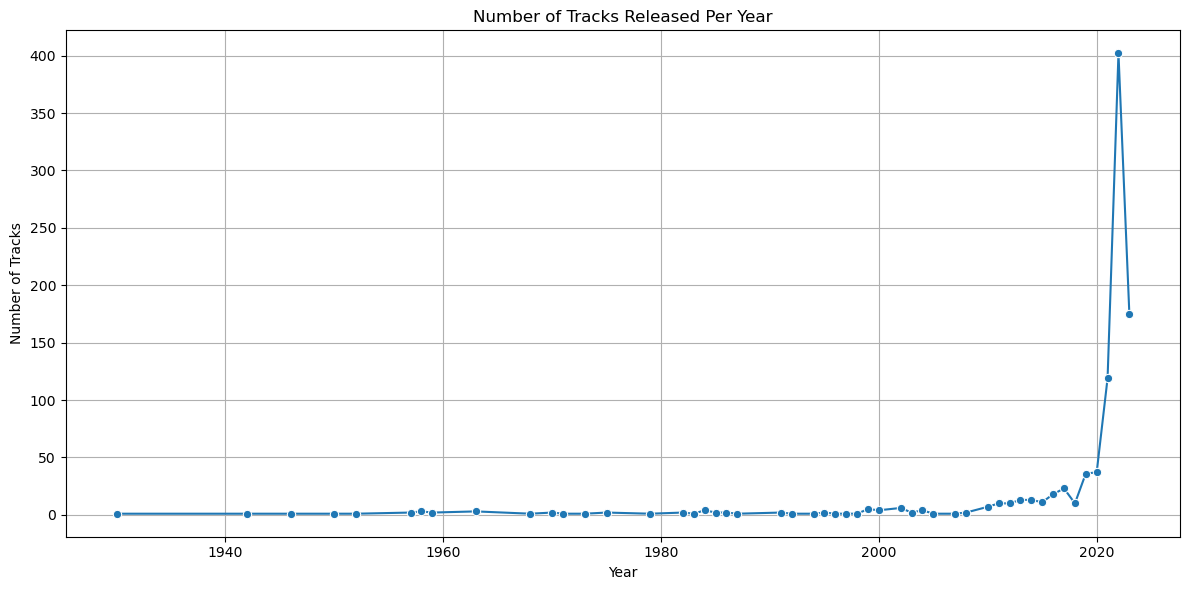

In [78]:
#Group using the column of "released_year" and count the number of tracks released each year 
tracks_per_year = spotify['released_year'].value_counts().sort_index() 

#Visualization of the numbers of tracks released each year 
plt.figure(figsize=(12, 6))
sns.lineplot(data = tracks_per_year, marker = 'o')
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid()
plt.tight_layout()
plt.show()

##### 2. Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

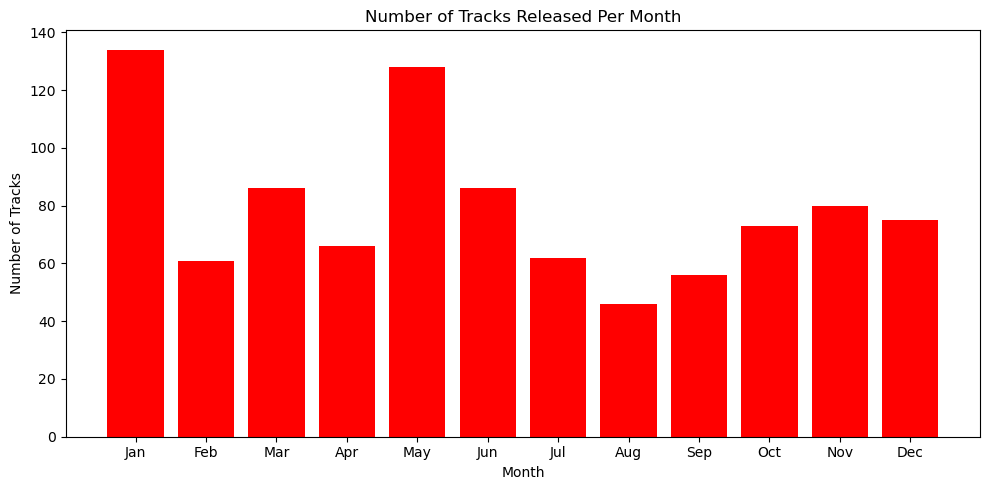

The month sees the most releases is Jan with 134 releases.


In [76]:
#Count of numbers of tracks released each month
tracks_per_month = spotify['released_month'].value_counts().sort_index()

#List of month names for better visualization
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#Visualization of the numbers of tracks released each month using bar graph 
plt.figure(figsize=(10, 5))
plt.bar(month_names, tracks_per_month.reindex(range(1, 13), fill_value =0), color = 'red',)
plt.title('Number of Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.tight_layout()
plt.show()

# Identify the month with the most releases
most_releases_month = tracks_per_month.idxmax()
most_releases_count = tracks_per_month.max()

print(f"The month sees the most releases is {month_names[most_releases_month - 1]} with {most_releases_count} releases.")

### Genre and Music Characteristics

##### 1. Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

Correlation Matrix between Streams and Musical Attributes: 

                 streams       bpm  danceability_%  energy_%
streams         1.000000 -0.002438       -0.105457 -0.026051
bpm            -0.002438  1.000000       -0.147095  0.025794
danceability_% -0.105457 -0.147095        1.000000  0.198095
energy_%       -0.026051  0.025794        0.198095  1.000000


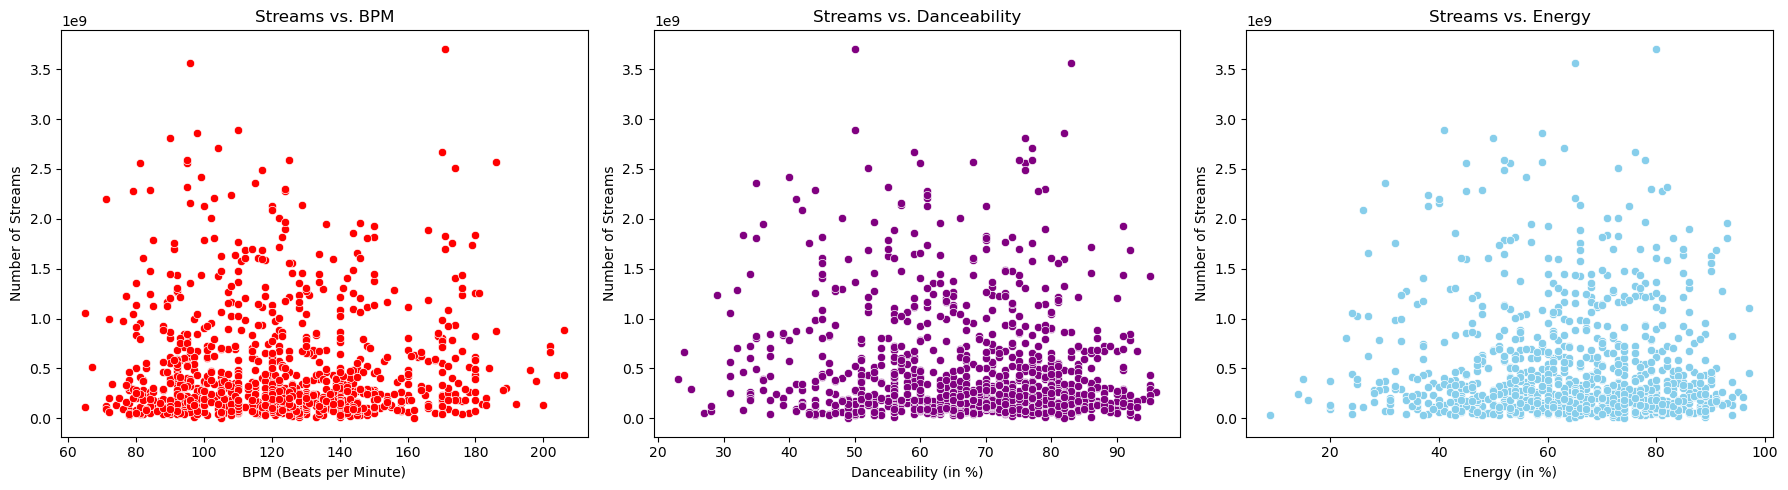

In [99]:
#Calculating the correlation matrix between streams and musical attributes 
correlation_matrix = spotify[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()

#Result of the correlation matrix betweeb streams and musical attributes 
print("Correlation Matrix between Streams and Musical Attributes: \n")
print(correlation_matrix)

#The size of the figures that will be displayed
plt.figure(figsize=(18, 5))

#Scatter plot for Streams vs. BPM
plt.subplot(1, 3, 1) 
sns.scatterplot(x = 'bpm', y = 'streams', data = spotify, color = 'red')
plt.title('Streams vs. BPM')
plt.xlabel('BPM (Beats per Minute)')
plt.ylabel('Number of Streams')

#Scatter plot for Streams vs. Danceability
plt.subplot(1, 3, 2)  
sns.scatterplot(x = 'danceability_%', y = 'streams', data = spotify, color = 'purple')
plt.title('Streams vs. Danceability')
plt.xlabel('Danceability (in %)')
plt.ylabel('Number of Streams')

#Scatter plot for Streams vs. Energy
plt.subplot(1, 3, 3)  
sns.scatterplot(x = 'energy_%', y = 'streams', data = spotify, color = 'skyblue')
plt.title('Streams vs. Energy')
plt.xlabel('Energy (in %)')
plt.ylabel('Number of Streams')
plt.tight_layout()
plt.show()


##### 2. Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

Correlation between Danceability and Energy: 0.20

Correlation between Valence and Acousticness: -0.08



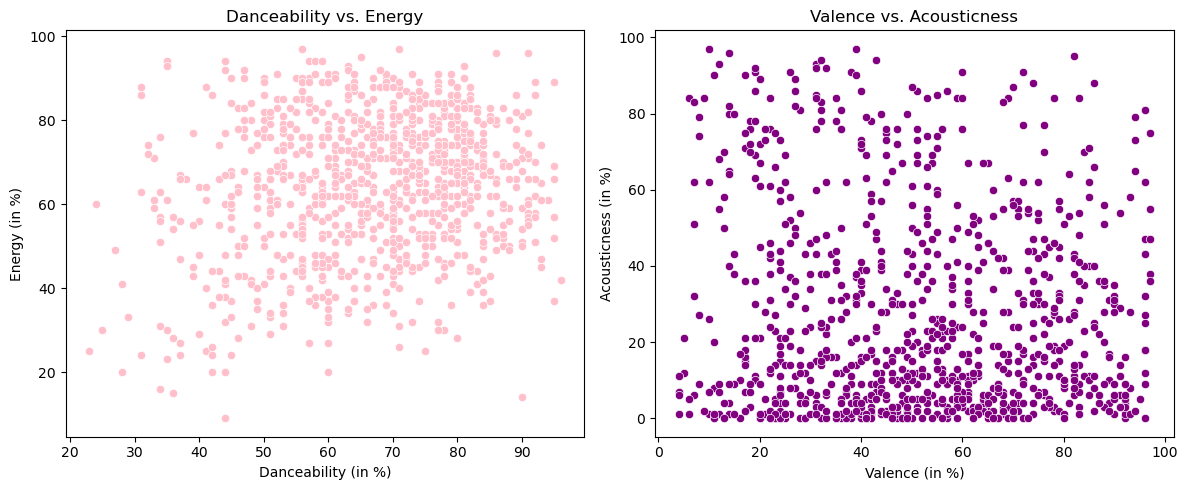

In [128]:
#Calculation of the correleation between Danceability and Energy, and Valence and Acousticness 
dance_energy_corr = spotify['danceability_%'].corr(spotify['energy_%'])
valence_acousticness_corr = spotify['valence_%'].corr(spotify['acousticness_%'])

#Result of the correleation between Danceability and Energy, and Valence and Acousticness  
print(f"Correlation between Danceability and Energy: {dance_energy_corr:.2f}\n")
print(f"Correlation between Valence and Acousticness: {valence_acousticness_corr:.2f}\n")

#The size of the figures that will be displayed
plt.figure(figsize=(12, 5))

#Scatter plot for Danceability vs. Energy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x = 'danceability_%', y = 'energy_%', data = spotify, color = 'pink')
plt.title('Danceability vs. Energy')
plt.xlabel('Danceability (in %)')
plt.ylabel('Energy (in %)')

# Scatter plot for Valence vs. Acousticness
plt.subplot(1, 2, 2) 
sns.scatterplot(x = 'valence_%', y = 'acousticness_%', data = spotify, color = 'purple')
plt.title('Valence vs. Acousticness')
plt.xlabel('Valence (in %)')
plt.ylabel('Acousticness (in %)')
plt.tight_layout()
plt.show()

###  Platform Popularity

##### 1. How do the numbers of tracks in spotify_playlists, deezer_playlist, and apple_playlists compare? Which platform seems to favor the most popular tracks?



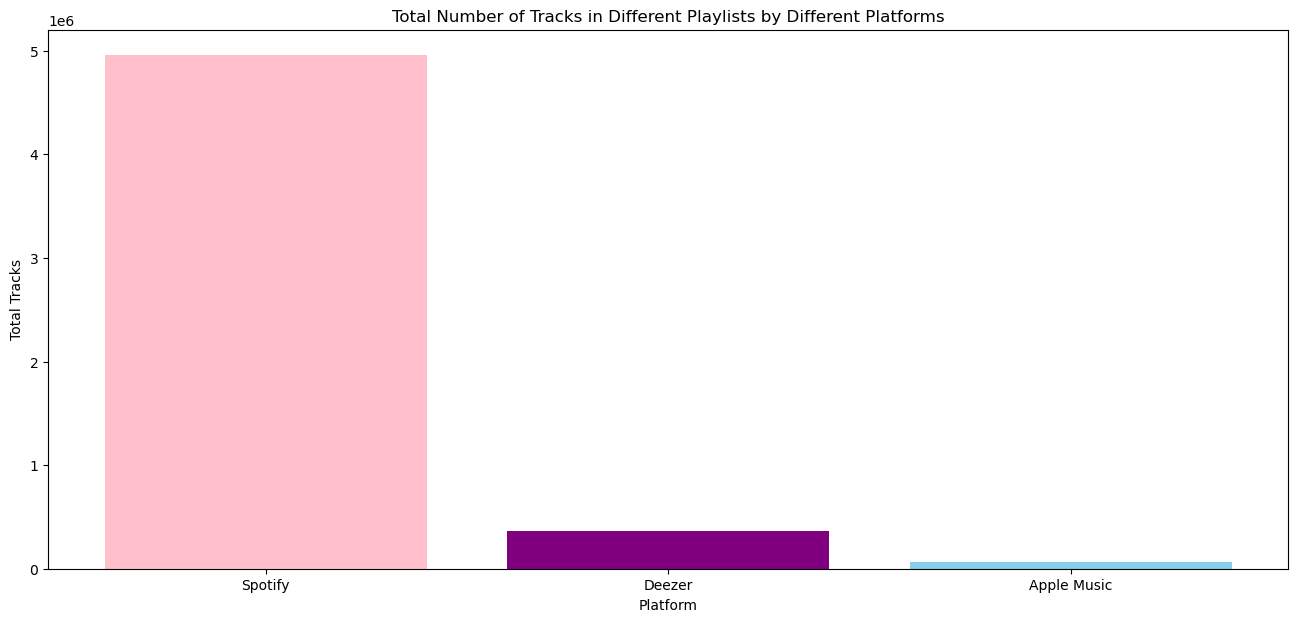

Popular Tracks in Spotify: 950

Popular Tracks in Deezer: 950

Popular Tracks in Apple Music: 950


In [239]:
#Calculating the the sum of the number of tracks per platform 
spotify_tracks = spotify['in_spotify_playlists'].sum()
deezer_tracks = spotify['in_deezer_playlists'].sum()  
apple_tracks = spotify['in_apple_playlists'].sum()

#DataFrame to hold the count of tracks
track_counts = pd.DataFrame({
    'Platform': ['Spotify', 'Deezer', 'Apple Music'],
    'Total Tracks': [spotify_tracks, deezer_tracks, apple_tracks]})

#The size of the figure that will be displayed
plt.figure(figsize=(16, 7))

#Graphing the number of tracks for per platform using bar plot
plt.bar(track_counts['Platform'], track_counts['Total Tracks'], color=['pink', 'purple', 'skyblue'])
plt.title('Total Number of Tracks in Different Playlists by Different Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Tracks')
plt.show()

#Popularity Standard in Streams
popularity = 5000000 

# Count the number of popular tracks per platform based on streams
popular_tracks_spotify = spotify[spotify['streams'] > popularity]['in_spotify_playlists'].count()
popular_tracks_deezer = spotify[spotify['streams'] > popularity]['in_deezer_playlists'].count()  
popular_tracks_apple = spotify[spotify['streams'] > popularity]['in_apple_playlists'].count()

# Display the number of popular tracks
print(f"Popular Tracks in Spotify: {popular_tracks_spotify}\n")
print(f"Popular Tracks in Deezer: {popular_tracks_deezer}\n")
print(f"Popular Tracks in Apple Music: {popular_tracks_apple}")


### Advanced Analysis

##### 1. Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

Statistics of Streams by Key:
 
   key          mean       median           std  count
0    A  4.088414e+08  241899327.5  4.466087e+08     74
1   A#  5.524754e+08  363467642.0  6.020724e+08     57
2    B  5.193480e+08  322336177.0  5.910144e+08     81
3   C#  6.042802e+08  309573860.0  7.258314e+08    120
4    D  5.295256e+08  298063749.0  5.739496e+08     81
5   D#  5.530365e+08  273194684.0  5.629377e+08     33
6    E  5.774972e+08  284811322.5  6.144343e+08     62
7    F  4.684464e+08  255120451.0  4.712031e+08     89
8   F#  5.223632e+08  283359161.0  5.845151e+08     73
9    G  4.525994e+08  251810759.0  4.911759e+08     96
10  G#  4.769119e+08  288101651.0  5.229070e+08     91


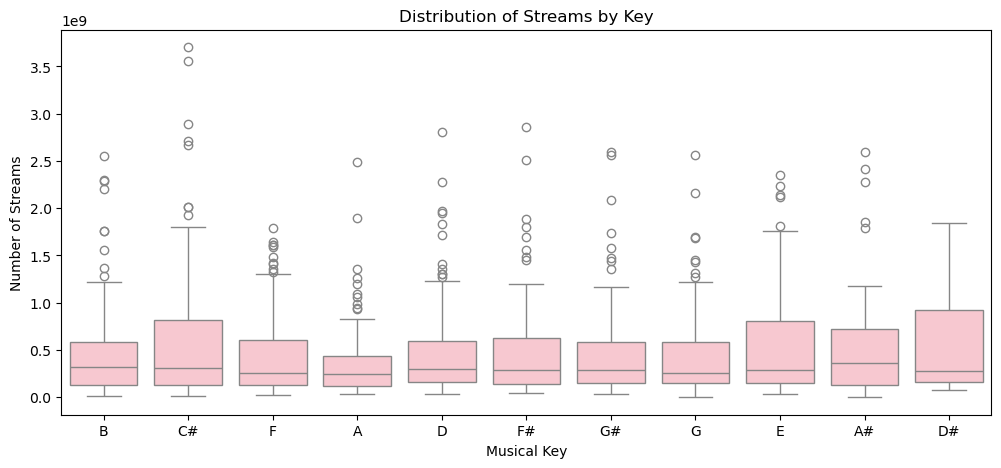

Streams statistics by mode:
 
    mode          mean       median           std  count
0  Major  5.348328e+08  302006641.0  5.780509e+08    549
1  Minor  4.859445e+08  273005485.0  5.507029e+08    403


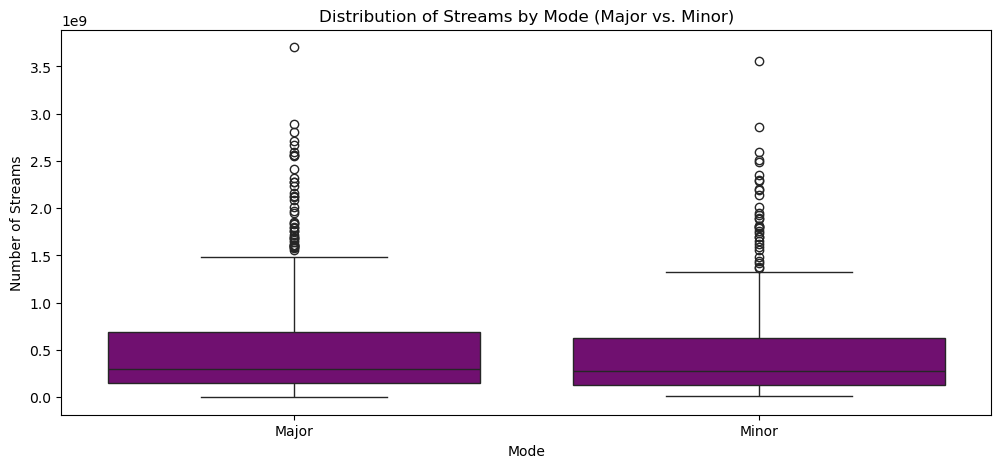

In [212]:
#Group in terms of 'key' and calculating the statistics for streams
key_groups = spotify.groupby('key')['streams'].agg(['mean', 'median', 'std', 'count']).reset_index()

#Result of the calculations of statistics of streams
print(f"Statistics of Streams by Key:\n \n{key_groups}")

#Graphing the distribution of streams for each key using box plot
plt.figure(figsize=(12, 5))
sns.boxplot(x = 'key', y = 'streams', data = spotify, color = 'pink')
plt.title('Distribution of Streams by Key')
plt.xlabel('Musical Key')
plt.ylabel('Number of Streams')
plt.show()

#Group in terms of 'mode' and calculating the statistics for streams
mode_groups = spotify.groupby('mode')['streams'].agg(['mean', 'median', 'std', 'count']).reset_index()

#Result of the calculations of statistics of streams
print(f"Streams statistics by mode:\n \n{mode_groups}")

#Graphing the distribution of streams for each key using box plot
plt.figure(figsize=(12, 5))
sns.boxplot(x = 'mode', y ='streams', data = spotify, color = 'purple')
plt.title('Distribution of Streams by Mode (Major vs. Minor)')
plt.xlabel('Mode')
plt.ylabel('Number of Streams')
plt.show()

##### 2. Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

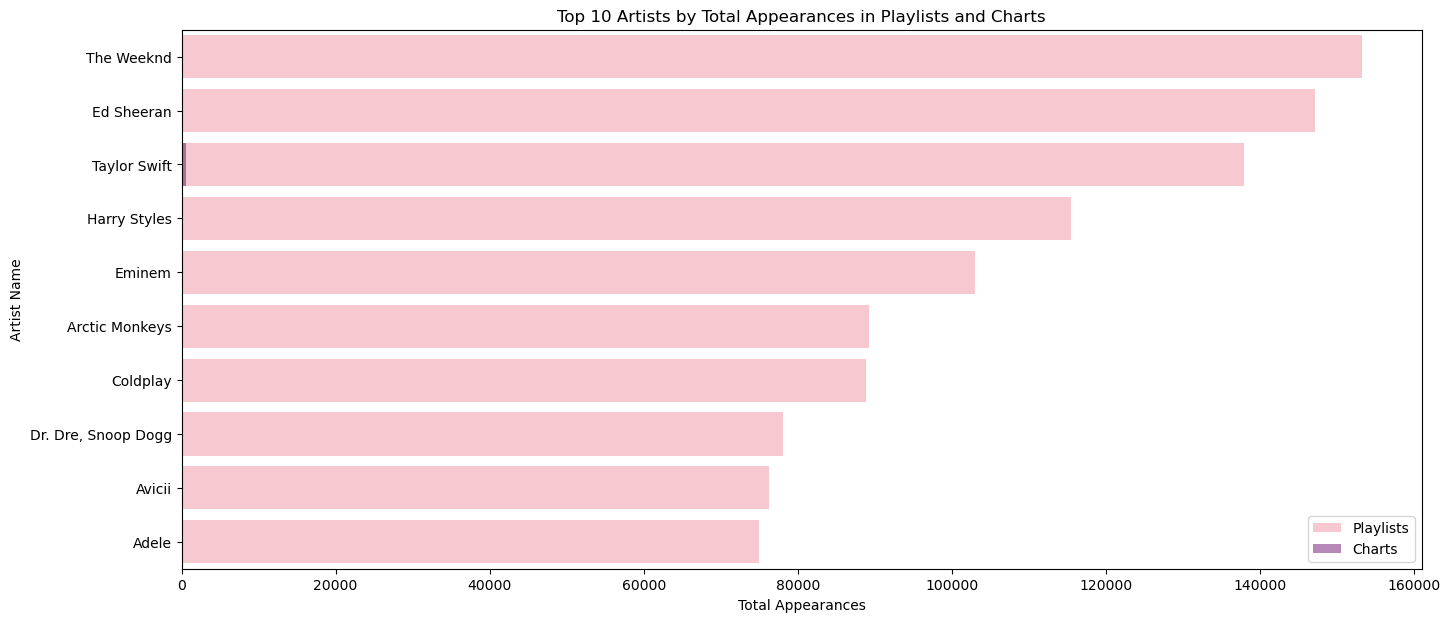

In [241]:
#Calculating the total of the playlists per platform 
spotify['total_playlists'] = (spotify['in_spotify_playlists'] + spotify['in_apple_playlists'] + spotify['in_deezer_playlists'])

#Getting the total charts
spotify['total_charts'] = (spotify['in_spotify_charts'])

#Grouped in terms of artist name and the summation of the total appearances of artists
artist_playlist_counts = spotify.groupby('artist(s)_name')['total_playlists'].sum().reset_index()
artist_chart_counts = spotify.groupby('artist(s)_name')['total_charts'].sum().reset_index()

#Merging the two DataFrames for Comaparison 
artist_counts = pd.merge(artist_playlist_counts, artist_chart_counts, on = 'artist(s)_name', how = 'outer')
artist_counts.columns = ['artist_name', 'total_playlists', 'total_charts']

#Sorting the artists by the total playlists and charts 
artist_counts = artist_counts.sort_values(by = 'total_playlists', ascending = False).head(10)

#Visualization of Top 10 Artist in terms of Apperances in Plalist and Charts using bar plot
plt.figure(figsize=(16, 7))
sns.barplot(x = 'total_playlists', y = 'artist_name', data = artist_counts, color = 'pink', label = 'Playlists')
sns.barplot(x = 'total_charts', y = 'artist_name', data = artist_counts, color = 'purple', label = 'Charts', alpha = 0.5)
plt.title('Top 10 Artists by Total Appearances in Playlists and Charts')
plt.xlabel('Total Appearances')
plt.ylabel('Artist Name')
plt.show()